<a href="https://www.kaggle.com/code/iqmansingh/object-classification-dogs-vs-cats?scriptVersionId=134610144" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import datetime
import warnings
warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Defining Classes & Generators

In [2]:
classes = ['cats','dogs']

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0, 
                               shear_range=0.15, 
                               zoom_range=0.2, 
                               horizontal_flip=True
                              ) 

train_data = generator.flow_from_directory( directory='../input/cat-and-dog/training_set/training_set', 
                                            target_size=(128, 128),
                                            color_mode='grayscale',
                                            classes=classes, 
                                            batch_size=64, 
                                            )


test_data = generator.flow_from_directory( directory='../input/cat-and-dog/test_set/test_set', 
                                           target_size=(128, 128), 
                                           color_mode='grayscale',
                                           classes=classes, 
                                           batch_size=64,
                                           shuffle=False
                                           )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# Building the CNN

In [4]:
model = tf.keras.models.Sequential()

In [5]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=[128,128,1]))

In [6]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))

In [7]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [8]:
model.add(tf.keras.layers.BatchNormalization())

In [9]:
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))

In [10]:
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))

In [11]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [12]:
model.add(tf.keras.layers.BatchNormalization())

In [13]:
model.add(tf.keras.layers.Flatten())

In [14]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [15]:
model.add(tf.keras.layers.Dropout(0.3))

In [16]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [17]:
model.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        3

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_crossentropy','accuracy'])

# Training the Model

In [20]:
earlyStopping =  tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy',restore_best_weights=True,start_from_epoch=25)

history = model.fit(train_data, epochs=50, validation_data=test_data, shuffle=True, callbacks=[earlyStopping],batch_size=64)
# history = model.fit(train_data, epochs=10, validation_split=0.2, shuffle=True, callbacks=[earlyStopping],batch_size=32)


Epoch 1/50
126/126 [==============================] - 87s 611ms/step - loss: 1.1024 - categorical_crossentropy: 1.1024 - accuracy: 0.5268 - val_loss: 0.7720 - val_categorical_crossentropy: 0.7720 - val_accuracy: 0.4963
Epoch 2/50
126/126 [==============================] - 33s 265ms/step - loss: 0.6821 - categorical_crossentropy: 0.6821 - accuracy: 0.5570 - val_loss: 0.7093 - val_categorical_crossentropy: 0.7093 - val_accuracy: 0.5062
Epoch 3/50
126/126 [==============================] - 33s 264ms/step - loss: 0.6685 - categorical_crossentropy: 0.6685 - accuracy: 0.5719 - val_loss: 1.2403 - val_categorical_crossentropy: 1.2403 - val_accuracy: 0.4849
Epoch 4/50
126/126 [==============================] - 34s 269ms/step - loss: 0.6495 - categorical_crossentropy: 0.6495 - accuracy: 0.6024 - val_loss: 0.6656 - val_categorical_crossentropy: 0.6656 - val_accuracy: 0.6199
Epoch 5/50
126/126 [==============================] - 32s 258ms/step - loss: 0.6278 - categorical_crossentropy: 0.6278 - acc

In [21]:
df = pd.DataFrame(history.history)
df_loss = df[['loss', 'val_loss']]
df_acc =  df[['accuracy', 'val_accuracy']]

# Plotting Validation Loss & Accuracy

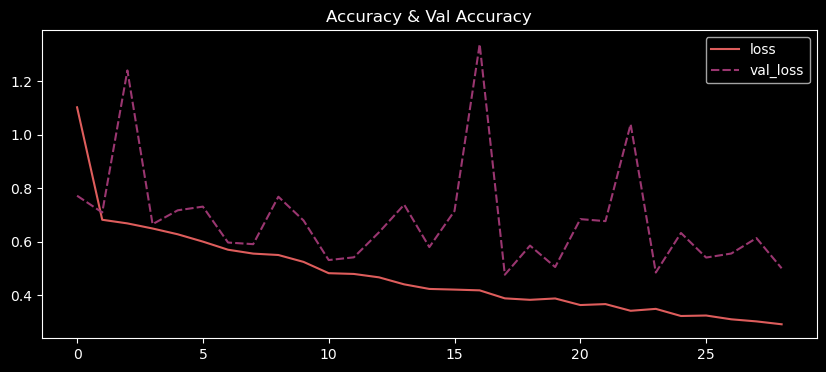

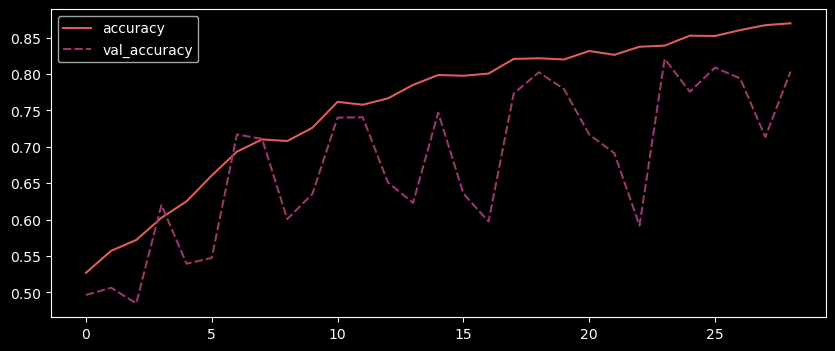

In [22]:
plt.figure(figsize=(10,4))
plt.title("Loss & Val Loss")
sns.lineplot(df_loss,palette="flare");

plt.title("Accuracy & Val Accuracy")
plt.figure(figsize=(10,4))
sns.lineplot(df_acc,palette="flare");

# Evaluating Test Set

In [24]:
evals = model.evaluate(test_data)
print(evals)

32/32 [==============================] - 7s 234ms/step - loss: 0.5159 - categorical_crossentropy: 0.5159 - accuracy: 0.8186
[0.5159465670585632, 0.5159465670585632, 0.8185862302780151]


In [25]:
print("Test Loss:", evals[0])
print("Test Accuracy:", evals[2])

Test Loss: 0.5159465670585632
Test Accuracy: 0.8185862302780151
